In [1]:
### 1 . Understanding dataset
# --------------------------------
# mpg - Miles per Gallon
# cyl - # of cylinders
# disp - displacement, in cubic inches
# hp - horsepower
# drat - driveshaft ratio (don't really KNOW cars, so if you've got questions - you know what to do. :-D
# wt - weight
# qsec - 1/4 mile time; a measure of acceleration
# vs - 'V' or straight - engine shape
# am - transmission; auto or manual
# gear - # of gears
# carb - # of carburetors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv(r'C:\Users\natta\OneDrive\Desktop\file\mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df_correl = df.drop(df.columns[0], axis=1)
correlation_matrix = df_correl.corr()
correlation_matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


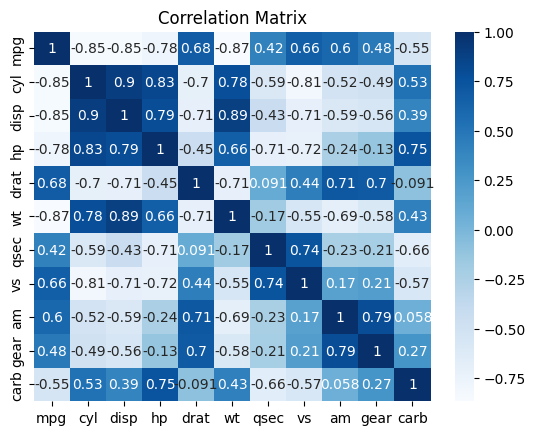

In [4]:
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

mpg     1.000000
wt      0.867659
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
vs      0.664039
am      0.599832
carb    0.550925
gear    0.480285
qsec    0.418684
Name: mpg, dtype: float64


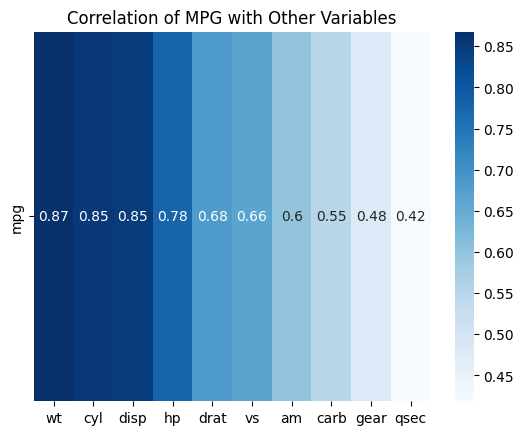

In [5]:
df_correl_mpg = np.abs(correlation_matrix['mpg']).sort_values(ascending=False)
print(df_correl_mpg)
df_correl_mpg = df_correl_mpg.drop('mpg')
df_heatmap = df_correl_mpg.values.reshape(1, -1)

# Create the heatmap
sns.heatmap(df_heatmap, annot=True, cmap='Blues', xticklabels=df_correl_mpg.index, yticklabels=['mpg'])
plt.title('Correlation of MPG with Other Variables')
plt.show()

In [6]:
df_top6_correl = df_correl_mpg.head(6)
print(df_top6_correl)
print('-'*30)
df_top6_correl_idx = df_top6_correl.index
print(df_top6_correl_idx)

wt      0.867659
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
vs      0.664039
Name: mpg, dtype: float64
------------------------------
Index(['wt', 'cyl', 'disp', 'hp', 'drat', 'vs'], dtype='object')


In [7]:
data = []
for idx in df_top6_correl_idx:
  correlation_coefficient, p_value = stats.pearsonr(df['mpg'], df[idx])
  print(f"correlation between mpg vs {idx} : {correlation_coefficient.round(3)}")
  print(f"P-value for mpg vs {idx}: {p_value}")
  print('-'*30)

  data.append([idx, correlation_coefficient, p_value])
  df_correl_pvalue = pd.DataFrame(data, columns=['Variable', 'Correlation Coefficient', 'P-value'])
  df_correl_pvalue = df_correl_pvalue.set_index('Variable')
print(df_correl_pvalue['Correlation Coefficient']['wt'])
df_correl_pvalue

correlation between mpg vs wt : -0.868
P-value for mpg vs wt: 1.293958701350513e-10
------------------------------
correlation between mpg vs cyl : -0.852
P-value for mpg vs cyl: 6.112687142581097e-10
------------------------------
correlation between mpg vs disp : -0.848
P-value for mpg vs disp: 9.380326537381379e-10
------------------------------
correlation between mpg vs hp : -0.776
P-value for mpg vs hp: 1.7878352541210675e-07
------------------------------
correlation between mpg vs drat : 0.681
P-value for mpg vs drat: 1.776239928752415e-05
------------------------------
correlation between mpg vs vs : 0.664
P-value for mpg vs vs: 3.415937254419958e-05
------------------------------
-0.8676593765172278


,Correlation Coefficient,P-value
Variable,,
wt,-0.867659,1.293959e-10
cyl,-0.852162,6.112687e-10
disp,-0.847551,9.380327e-10
hp,-0.776168,1.787835e-07
drat,0.681172,1.776240e-05
vs,0.664039,3.415937e-05


slope : -5.344 | intercept 37.285
slope : -2.876 | intercept 37.885
slope : -0.041 | intercept 29.6
slope : -0.068 | intercept 30.099
slope : 7.678 | intercept -7.525
slope : 7.94 | intercept 16.617


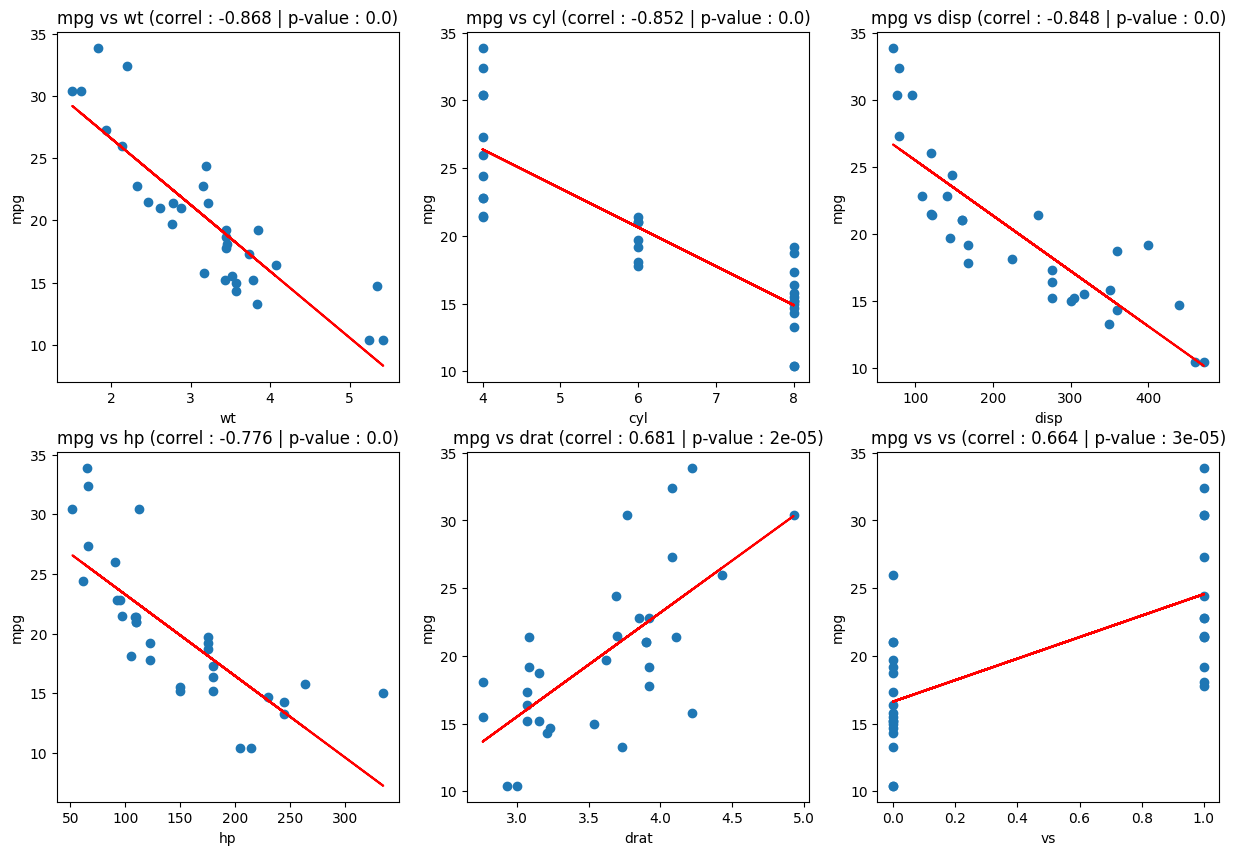

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs = axs.flatten()
for i, idx in enumerate(df_top6_correl_idx):
    axs[i].scatter(df[idx], df['mpg'])  # Create scatter plot in each subplot
    axs[i].set_xlabel(idx)  # Set x-axis label
    axs[i].set_ylabel('mpg')  # Set y-axis label
    axs[i].set_title(f"mpg vs {idx} (correl : {df_correl_pvalue['Correlation Coefficient'][idx].round(3)} | p-value : {df_correl_pvalue['P-value'][idx].round(5)})")

    m, b = np.polyfit(df[idx], df['mpg'], 1)
    print(f"slope : {m.round(3)} | intercept {b.round(3)}")
    axs[i].plot(df[idx], m*df[idx] + b, color = 'red')

plt.show()

In [9]:
X = df[df_top6_correl_idx]
Y = df[['mpg']]
# print(Y)
# print(X)
data_train, data_test = [], []

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# print(X_train.index, y_train.index)
data_train = pd.concat([y_train, X_train], axis=1)
data_train["Model"] = df.loc[X_train.index, 'model']
data_train

,mpg,wt,cyl,disp,hp,drat,vs,Model
5,18.1,3.460,6,225.0,105,2.76,1,Valiant
22,15.2,3.435,8,304.0,150,3.15,0,AMC Javelin
25,27.3,1.935,4,79.0,66,4.08,1,Fiat X1-9
9,19.2,3.440,6,167.6,123,3.92,1,Merc 280
1,21.0,2.875,6,160.0,110,3.90,0,Mazda RX4 Wag
4,18.7,3.440,8,360.0,175,3.15,0,Hornet Sportabout
21,15.5,3.520,8,318.0,150,2.76,0,Dodge Challenger
24,19.2,3.845,8,400.0,175,3.08,0,Pontiac Firebird
27,30.4,1.513,4,95.1,113,3.77,1,Lotus Europa
31,21.4,2.780,4,121.0,109,4.11,1,Volvo 142E


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test).round(3) # y_pred -> list

# y_pred -> dataframe
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=["Predicted"])
data_test = pd.concat([y_test, y_pred_df], axis=1)
data_test.columns = ["Actual", "Predicted"]
data_test["Error"] = abs(data_test["Actual"] - data_test["Predicted"])
data_test["Model"] = df.loc[y_test.index, 'model']
data_test = data_test[["Model", "Actual", "Predicted", "Error"]]

data_test

,Model,Actual,Predicted,Error
8,Merc 230,22.8,23.939,1.139
20,Toyota Corona,21.5,25.668,4.168
28,Ford Pantera L,15.8,19.205,3.405
10,Merc 280C,17.8,20.786,2.986
15,Lincoln Continental,10.4,10.834,0.434
26,Porsche 914-2,26.0,27.487,1.487
18,Honda Civic,30.4,31.875,1.475


In [11]:
print(f"Intercept (b0): {model.intercept_}")
print(f"Coefficients (b1, b2, ...): {model.coef_}")
inter = model.intercept_[0].round(3)
coef = model.coef_[0].round(3)
print("-"*30)
print(f"y = {coef[0]}X0 + {coef[1]}X1 + {coef[2]}X2 + {coef[3]}X3 + {coef[4]}X4 + {inter}")

Intercept (b0): [29.67701096]
Coefficients (b1, b2, ...): [[-3.7683846  -0.92912895  0.01570852 -0.02224222  2.19539796  1.14418835]]
------------------------------
y = -3.768X0 + -0.929X1 + 0.016X2 + -0.022X3 + 2.195X4 + 29.677


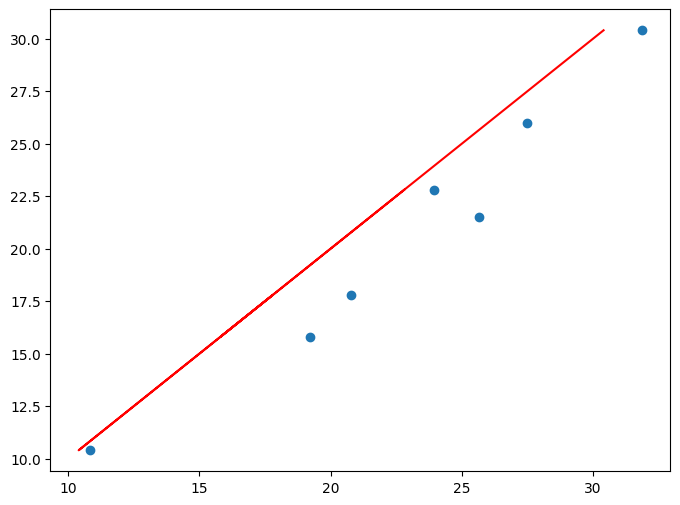

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test , color = 'red')

In [13]:
# คำนวณค่าความคลาดเคลื่อน (Mean Squared Error) และค่า R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R² Score: {round(r2, 3)}")

Mean Squared Error: 6.251
R² Score: 0.835
